# Scraping

In [ ]:
# username = driver.find_element_by_name('username')
# password = driver.find_element_by_name('password')

# username.send_keys('Josh')
# password.send_keys('Limowitz13!') #passing details into website automatically

# login_button = driver.find_element_by_name('submit') 
# login_button.click() #clicking on button

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
website = 'https://www.airbnb.ca/rooms/2284840?source_impression_id=p3_1571525312_hCBYip0DYX%2BCgERF'

In [95]:
from time import sleep
from selenium.webdriver.common.keys import Keys
#Configuring webdriver to use chrome browser
driver = webdriver.Chrome("C:/Users/mindy/Downloads/chromedriver_win32/chromedriver.exe")
driver.get(website)
print('Im sleeping!!')
sleep(5)
print('Im doing work')

Im sleeping!!
Im doing work


In [108]:
content = driver.page_source #this returns a html file
soup = BeautifulSoup(content, 'lxml') #this will parse html into unicode

# Scraping Through Individual Reviews

In [126]:
content = driver.page_source #this returns a html file
soup = BeautifulSoup(content, 'lxml') #this will parse html into unicode

for review in soup.find_all('div', attrs={'class':'_czm8crp', 'dir': 'ltr'}):
    print(review.text)    
    print('__________________________________________________________')
    table.append(review.text)
table

We had an amazing 3 days at Dave's cottage! The private lake was beautiful and the perfect size, and we loved the diving rock/rope swing on the other side of the lake. The cabin was the perfect size for 10 of us all, very cozy and comfortable. The Sauna was also amazing along with the fire pit to keep us entertained and warm at night. Would definitely come back anytime.
__________________________________________________________
David was very helpful in everyday possible. He made us feel very welcome and we were so lucky to experience and stay at his beautiful property. We were in a group of 10 and spent the entire weekend at his property, with our own private lake, sauna and walking trails to explore. It was a great escape from the city. Will definitely recommend this place and David as a host to any fellow traveller. 
__________________________________________________________
David's place is absolutely amazing! I would definitely recommend it to any group hoping to get out into the 

["Incredibly unique and beautiful spot. There is no other property like it. It's very private and ideal for a modest outdoorsman. There are more than enough touches to make it a comfortable stay. The lake and sauna are very relaxing and should definitely be enjoyed. The cabin is very well equipped and comes with chopped firewood so the stay can be easy. Dave was a great host and a phone call away to answer our questions. Will definitely consider returning!!",
 'This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world. Clean and comfortable an all round amazing trip.',
 'Our stay at Michabo lake was fantastic. The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing. It was very private. We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes. All in all a very relaxing weekend at the lake.',
 "This is an OUTSTANDING place! It is extr

In [128]:
len(table)
#table

86

# Removing Duplicates

In [131]:
final = []
for review in table: 
    if review not in final: 
        final.append(review)
final

["Incredibly unique and beautiful spot. There is no other property like it. It's very private and ideal for a modest outdoorsman. There are more than enough touches to make it a comfortable stay. The lake and sauna are very relaxing and should definitely be enjoyed. The cabin is very well equipped and comes with chopped firewood so the stay can be easy. Dave was a great host and a phone call away to answer our questions. Will definitely consider returning!!",
 'This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world. Clean and comfortable an all round amazing trip.',
 'Our stay at Michabo lake was fantastic. The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing. It was very private. We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes. All in all a very relaxing weekend at the lake.',
 "This is an OUTSTANDING place! It is extr

In [132]:
len(final)

61

In [133]:
import json
my_json_string = json.dumps(final)
my_json_string

'["Incredibly unique and beautiful spot. There is no other property like it. It\'s very private and ideal for a modest outdoorsman. There are more than enough touches to make it a comfortable stay. The lake and sauna are very relaxing and should definitely be enjoyed. The cabin is very well equipped and comes with chopped firewood so the stay can be easy. Dave was a great host and a phone call away to answer our questions. Will definitely consider returning!!", "This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world. Clean and comfortable an all round amazing trip.", "Our stay at Michabo lake was fantastic. The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing. It was very private. We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes. All in all a very relaxing weekend at the lake.", "This is an OUTSTANDING place! It is extre

# Overcoming Read Me

In [110]:
import random
flag = False
buttons = driver.find_elements_by_class_name('_b0ybw8s')
for button in buttons: 
    #sleep(random.randint(1,9))
    if (not flag): 
        if (button.text == 'Read more'): #this is the first read more (1)
            flag = True
            sleep(random.randint(10,15))
            print(button.text)
            button.click()
            print('Starting Clicks')
    else: #we have started clicking read more
        if (button.text != 'Read more'): #there are no more read more (3)
            print('End Clicks')
            break
        else: #iterating through the read more (2)
            sleep(random.randint(10,15))
            button.click()
            print(button.text)
            print('Clicked')

# Converting Output list into DataFrame

In [136]:
data = pd.DataFrame(final, columns = ['Reviews'])
data.head()

,Reviews
0,Incredibly unique and beautiful spot. There is...
1,This cottage offers a rare opportunity it expe...
2,Our stay at Michabo lake was fantastic. The ca...
3,This is an OUTSTANDING place! It is extremely ...
4,I stayed at David's cottage for a family getaw...


In [137]:
data['Word Count'] = data['Reviews'].apply(lambda x: len(x.split(' ')))
data.head()

,Reviews,Word Count
0,Incredibly unique and beautiful spot. There is...,80
1,This cottage offers a rare opportunity it expe...,24
2,Our stay at Michabo lake was fantastic. The ca...,60
3,This is an OUTSTANDING place! It is extremely ...,131
4,I stayed at David's cottage for a family getaw...,170


In [141]:
data['Sentence Count'] = data['Reviews'].apply(lambda x: len(x.split('. ')) + 1)
data.head()

,Reviews,Word Count,Sentence Count
0,Incredibly unique and beautiful spot. There is...,80,9
1,This cottage offers a rare opportunity it expe...,24,3
2,Our stay at Michabo lake was fantastic. The ca...,60,6
3,This is an OUTSTANDING place! It is extremely ...,131,8
4,I stayed at David's cottage for a family getaw...,170,11


# Identifying Top Common and Uncommon Words

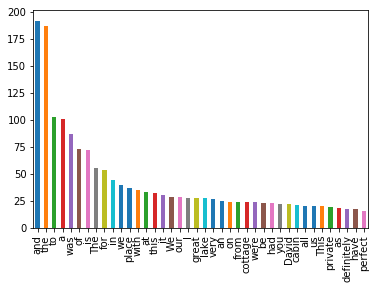

In [145]:
top_common = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:40]
top_common.plot(kind = 'bar')

In [148]:
top_uncommon =  pd.Series(' '.join(data['Reviews']).split()).value_counts()[-20:]
top_uncommon

supper          1
Perfect         1
filled          1
great.          1
separate        1
provided        1
michabo         1
view.           1
Warming         1
heart           1
doesn’t         1
imagine.        1
Perhaps         1
bunkie.Sauna    1
tidy            1
expected,       1
doubles         1
world,          1
beat            1
fridge.         1
dtype: int64

In [149]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mindy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mindy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


# Removing Stop Words

Stop words are not keywords.

In [162]:
pd.options.display.max_colwidth = 1000
#removing punctuations
data['Processed'] = data['Reviews'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x)) 

#changing all characters to lowercase
data['Processed'] = data['Processed'].apply(lambda x: x.lower()) 

#removing texts
data['Processed'] = data['Processed'].apply(lambda x: re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", x))

# remove special characters and digits
data['Processed'] = data['Processed'].apply(lambda x: re.sub("(\\d|\\W)+"," ",x))
data['Processed'].values

array(['incredibly unique and beautiful spot there is no other property like it it s very private and ideal for a modest outdoorsman there are more than enough touches to make it a comfortable stay the lake and sauna are very relaxing and should definitely be enjoyed the cabin is very well equipped and comes with chopped firewood so the stay can be easy dave was a great host and a phone call away to answer our questions will definitely consider returning ',
       'this cottage offers a rare opportunity it experience canadian beauty without intrusion from the outside world clean and comfortable an all round amazing trip ',
       'our stay at michabo lake was fantastic the cabin and bunkie were tidy the beds were comfortable and the lake was great for swimming and fishing it was very private we had plenty of cooking amenities and the hot water from the sauna was great for showers and doing dishes all in all a very relaxing weekend at the lake ',
       'this is an outstanding place it 

In [150]:
##In built list of stopwords in the English Language
stop_words = set(stopwords.words("english"))

##Creating a list of custom stopwords
new_words = ["enough", "make", "come", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

In [485]:
##Convert from String to List
data['Keywords'] = data['Processed'].apply(lambda x: x.split())

corpus = []
##Stemming
ps=PorterStemmer()
#Lemmatisation
lem = WordNetLemmatizer()

dictionary = []
def function(x):
    words = []
    for word in x: 
        if not word in stop_words: 
#             words.append(lem.lemmatize(word))
#             dictionary.append(lem.lemmatize(word))
            
            words.append(word)
            dictionary.append(word)
    return words
data['Keywords'] = data['Keywords'].apply(lambda x: function(x))
#data.head()
#text = " ".join(text)
print(text)
#corpus.append(text)
#corpus
data.head()

d               a               v               i               d                               h               e               l               p               f               u               l                               e               v               e               r               y               d               a               y                               p               o               s               s               i               b               l               e                               m               a               d               e                               u                               f               e               e               l                               w               e               l               c               o               m               e                               l               u               c               k               y                               e               x               p               e               r       

,Reviews,Word Count,Sentence Count,Processed,Keywords,Sentences
0,Incredibly unique and beautiful spot. There is no other property like it. It's very private and ideal for a modest outdoorsman. There are more than enough touches to make it a comfortable stay. The lake and sauna are very relaxing and should definitely be enjoyed. The cabin is very well equipped and comes with chopped firewood so the stay can be easy. Dave was a great host and a phone call away to answer our questions. Will definitely consider returning!!,80,9,incredibly unique and beautiful spot there is no other property like it it s very private and ideal for a modest outdoorsman there are more than enough touches to make it a comfortable stay the lake and sauna are very relaxing and should definitely be enjoyed the cabin is very well equipped and comes with chopped firewood so the stay can be easy dave was a great host and a phone call away to answer our questions will definitely consider returning,"[incredibly, unique, beautiful, spot, property, like, private, ideal, modest, outdoorsman, enough, touches, make, comfortable, stay, lake, sauna, relaxing, definitely, enjoyed, cabin, well, equipped, comes, chopped, firewood, stay, easy, dave, great, host, phone, call, away, answer, questions, definitely, consider, returning]","[Incredibly unique and beautiful spot, There is no other property like it, It's very private and ideal for a modest outdoorsman, There are more than enough touches to make it a comfortable stay, The lake and sauna are very relaxing and should definitely be enjoyed, The cabin is very well equipped and comes with chopped firewood so the stay can be easy, Dave was a great host and a phone call away to answer our questions, Will definitely consider returning!!]"
1,This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world. Clean and comfortable an all round amazing trip.,24,3,this cottage offers a rare opportunity it experience canadian beauty without intrusion from the outside world clean and comfortable an all round amazing trip,"[cottage, offers, rare, opportunity, experience, canadian, beauty, without, intrusion, outside, world, clean, comfortable, round, amazing, trip]","[This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world, Clean and comfortable an all round amazing trip.]"
2,"Our stay at Michabo lake was fantastic. The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing. It was very private. We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes. All in all a very relaxing weekend at the lake.",60,6,our stay at michabo lake was fantastic the cabin and bunkie were tidy the beds were comfortable and the lake was great for swimming and fishing it was very private we had plenty of cooking amenities and the hot water from the sauna was great for showers and doing dishes all in all a very relaxing weekend at the lake,"[stay, michabo, lake, fantastic, cabin, bunkie, tidy, beds, comfortable, lake, great, swimming, fishing, private, plenty, cooking, amenities, hot, water, sauna, great, showers, dishes, relaxing, weekend, lake]","[Our stay at Michabo lake was fantastic, The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing, It was very private, We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes, All in all a very relaxing weekend at the lake.]"
3,"This is an OUTSTANDING place! It is extremely rare that you can find such a secluded place with all lake just for you. The cottage actually has everything that you need, it accomdates 10 people comfortably, and everything is in good condition. The shower is outside the sauna, but really the water in the lake is so warm, that we never used that shower. The forest around the cottage is ama

In [268]:
dict_df = pd.DataFrame(dictionary, columns = ['Keywords'])
dict_df['Keywords'].value_counts()[:40]

lake           46
place          41
david          41
cottage        35
great          31
stay           29
private        28
cabin          26
back           22
amazing        22
dave           21
us             21
beautiful      21
sauna          21
experience     20
definitely     19
property       19
perfect        18
host           16
would          15
time           15
recommend      15
group          15
weekend        14
really         13
available      13
water          13
rustic         12
privacy        12
nice           12
away           12
comfortable    12
fire           12
helpful        11
wonderful      11
michabo        10
city           10
pit            10
questions      10
best            9
Name: Keywords, dtype: int64

In [293]:
data.head()

,Reviews,Word Count,Sentence Count,Processed,Keywords,Sentences
0,Incredibly unique and beautiful spot. There is no other property like it. It's very private and ideal for a modest outdoorsman. There are more than enough touches to make it a comfortable stay. The lake and sauna are very relaxing and should definitely be enjoyed. The cabin is very well equipped and comes with chopped firewood so the stay can be easy. Dave was a great host and a phone call away to answer our questions. Will definitely consider returning!!,80,9,incredibly unique and beautiful spot there is no other property like it it s very private and ideal for a modest outdoorsman there are more than enough touches to make it a comfortable stay the lake and sauna are very relaxing and should definitely be enjoyed the cabin is very well equipped and comes with chopped firewood so the stay can be easy dave was a great host and a phone call away to answer our questions will definitely consider returning,"[incredibly, unique, beautiful, spot, property, like, private, ideal, modest, outdoorsman, enough, touches, make, comfortable, stay, lake, sauna, relaxing, definitely, enjoyed, cabin, well, equipped, comes, chopped, firewood, stay, easy, dave, great, host, phone, call, away, answer, questions, definitely, consider, returning]","[Incredibly unique and beautiful spot, There is no other property like it, It's very private and ideal for a modest outdoorsman, There are more than enough touches to make it a comfortable stay, The lake and sauna are very relaxing and should definitely be enjoyed, The cabin is very well equipped and comes with chopped firewood so the stay can be easy, Dave was a great host and a phone call away to answer our questions, Will definitely consider returning!!]"
1,This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world. Clean and comfortable an all round amazing trip.,24,3,this cottage offers a rare opportunity it experience canadian beauty without intrusion from the outside world clean and comfortable an all round amazing trip,"[cottage, offers, rare, opportunity, experience, canadian, beauty, without, intrusion, outside, world, clean, comfortable, round, amazing, trip]","[This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world, Clean and comfortable an all round amazing trip.]"
2,"Our stay at Michabo lake was fantastic. The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing. It was very private. We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes. All in all a very relaxing weekend at the lake.",60,6,our stay at michabo lake was fantastic the cabin and bunkie were tidy the beds were comfortable and the lake was great for swimming and fishing it was very private we had plenty of cooking amenities and the hot water from the sauna was great for showers and doing dishes all in all a very relaxing weekend at the lake,"[stay, michabo, lake, fantastic, cabin, bunkie, tidy, beds, comfortable, lake, great, swimming, fishing, private, plenty, cooking, amenities, hot, water, sauna, great, showers, dishes, relaxing, weekend, lake]","[Our stay at Michabo lake was fantastic, The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing, It was very private, We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes, All in all a very relaxing weekend at the lake.]"
3,"This is an OUTSTANDING place! It is extremely rare that you can find such a secluded place with all lake just for you. The cottage actually has everything that you need, it accomdates 10 people comfortably, and everything is in good condition. The shower is outside the sauna, but really the water in the lake is so warm, that we never used that shower. The forest around the cottage is ama

In [295]:
sentences = []
def full_stop_split(chunk): 
    sentences.extend(chunk.split(". "))
    return chunk.split(". ")

def exclamation_split(chunk): 
    sentences.extend(chunk.split("! "))
    return chunk.split("! ")

data['Sentences'] = data['Reviews'].apply(lambda x: full_stop_split(x))
#data['Sentences'] = data['Sentences'].apply(lambda x: exclamation_split(x))

sentences = pd.DataFrame(sentences, columns = ['Sentences'])

#removing punctuations
sentences['Processed'] = sentences['Sentences'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x)) 

#changing all characters to lowercase
sentences['Processed'] = sentences['Processed'].apply(lambda x: x.lower()) 

#removing texts
sentences['Processed'] = sentences['Processed'].apply(lambda x: re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", x))

# remove special characters and digits
sentences['Processed'] = sentences['Processed'].apply(lambda x: re.sub("(\\d|\\W)+"," ",x))
sentences['Processed'].values


#data.head()
sentences

,Sentences,Processed
0,Incredibly unique and beautiful spot,incredibly unique and beautiful spot
1,There is no other property like it,there is no other property like it
2,It's very private and ideal for a modest outdoorsman,it s very private and ideal for a modest outdoorsman
3,There are more than enough touches to make it a comfortable stay,there are more than enough touches to make it a comfortable stay
4,The lake and sauna are very relaxing and should definitely be enjoyed,the lake and sauna are very relaxing and should definitely be enjoyed
5,The cabin is very well equipped and comes with chopped firewood so the stay can be easy,the cabin is very well equipped and comes with chopped firewood so the stay can be easy
6,Dave was a great host and a phone call away to answer our questions,dave was a great host and a phone call away to answer our questions
7,Will definitely consider returning!!,will definitely consider returning
8,This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world,this cottage offers a rare opportunity it experience canadian beauty without intrusion from the outside world
9,Clean and comfortable an all round amazing trip.,clean and comfortable an all round amazing trip


In [301]:
def generate(key):
    print(key)
    key_sentences = []
    for sentence in sentences['Processed'].values: 
        if key in sentence: 
            key_sentences.append(sentence)
    #print(key_sentences)
    selected_sentences = []
    while (len(selected_sentences) < 5 and len(key_sentences) >0): 
        rand_num = random.randint(0,len(key_sentences)-1)
        selection = key_sentences[rand_num]
        key_sentences.remove(selection)
        #sleep(random.randint(1,2))
        print(selection)
        selected_sentences.append(selection)
    print(selected_sentences)
    return selected_sentences

In [302]:
generate('lake')

lake
an amazing private retreat for a group beautiful lake all to yourselves a rustic but perfectly maintained main cottage with cool little bunkie sauna was an excellent addition as it heated water for the cabin as well as a outdoor shower the dock out on the lake was a perfect spot to relax and the fire pit was handy for its nice size grill good spot
beautiful quite area with private access to the lake
we were in a group of and spent the entire weekend at his property with our own private lake sauna and walking trails to explore
we had the most wonderful stay on lake michabo relaxing and completely private we were in heaven
the lake is much larger than i thought and the water was great to swim in
['an amazing private retreat for a group beautiful lake all to yourselves a rustic but perfectly maintained main cottage with cool little bunkie sauna was an excellent addition as it heated water for the cabin as well as a outdoor shower the dock out on the lake was a perfect spot to relax a

['an amazing private retreat for a group beautiful lake all to yourselves a rustic but perfectly maintained main cottage with cool little bunkie sauna was an excellent addition as it heated water for the cabin as well as a outdoor shower the dock out on the lake was a perfect spot to relax and the fire pit was handy for its nice size grill good spot',
 'beautiful quite area with private access to the lake',
 'we were in a group of and spent the entire weekend at his property with our own private lake sauna and walking trails to explore',
 'we had the most wonderful stay on lake michabo relaxing and completely private we were in heaven',
 'the lake is much larger than i thought and the water was great to swim in']

In [303]:
dict_df['Output'] = dict_df['Keywords'].apply(lambda x: generate(x))

incredibly
incredibly unique and beautiful spot
david was incredibly hospitable and a real gent
['incredibly unique and beautiful spot', 'david was incredibly hospitable and a real gent']
unique
by phone most guests will enjoy the unique chance to be on their own but any level of hosting can be negotiated
incredibly unique and beautiful spot
a unique cabin perfect for getting away from the city and the more overbuilt parts of cottage country
the decor furniture and overall estate had such unique old school characters
david is a wonderful and attentive host who obviously cares about your experience on this unique property
['by phone most guests will enjoy the unique chance to be on their own but any level of hosting can be negotiated', 'incredibly unique and beautiful spot', 'a unique cabin perfect for getting away from the city and the more overbuilt parts of cottage country', 'the decor furniture and overall estate had such unique old school characters', 'david is a wonderful and atte

i would highly recommend this place to anyone
i recommend bringing charcoals david was a great host and was available i would definitely return for another stay 
 would strongly recommend it to anyone looking for an off grid getaway 
i would do anything to live here 
[' stay would book again', 'i would highly recommend this place to anyone', 'i recommend bringing charcoals david was a great host and was available i would definitely return for another stay ', ' would strongly recommend it to anyone looking for an off grid getaway ', 'i would do anything to live here ']
book
david was really great to communicate with from the time of the booking to our stay
we will be rebooking for multiple weekends for years to come
 stay would book again
 will be booking again soon 
['david was really great to communicate with from the time of the booking to our stay', 'we will be rebooking for multiple weekends for years to come', ' stay would book again', ' will be booking again soon ']
david
 david 

our group enjoyed the seclusion of the cabin and private lake i recommend bringing a canoe
['our group enjoyed the seclusion of the cabin and private lake i recommend bringing a canoe']
cabin
the cabin was just what we all needed to escape our busy schedules and have an awesome guys weekend of fishing and shenanigans
authentic cottage separate bunky cabin sauna outdoor shower 
we had an amazing long weekend at dave s cabin
the cabin and bunk house slept very comfortably
the privacy here is great and the cottage is the perfect rustic cabin in the woods
['the cabin was just what we all needed to escape our busy schedules and have an awesome guys weekend of fishing and shenanigans', 'authentic cottage separate bunky cabin sauna outdoor shower ', 'we had an amazing long weekend at dave s cabin', 'the cabin and bunk house slept very comfortably', 'the privacy here is great and the cottage is the perfect rustic cabin in the woods']
private
the lack of electricity actually made the stay that 

dave was available anytime for any questions we had and the cabin was the perfect balance of a rustic back to nature experience and a comfortable cottage stay
we had an amazing long weekend at dave s cabin
['the lake is stunning and the cabin is quite spacious', 'we had a lot of fun david thought us the ins and outs of the cabin and sauna and was always available by phone if we had a question i would throughly recommend staying here to anyone ', 'the cabin and bunkie were tidy the beds were comfortable and the lake was great for swimming and fishing', 'dave was available anytime for any questions we had and the cabin was the perfect balance of a rustic back to nature experience and a comfortable cottage stay', 'we had an amazing long weekend at dave s cabin']
beautiful
the cabin is beautiful rustic and spacious
this beautiful property is definitely undersold in the listing
the lack of electricity actually made the stay that much more enjoyable without electronics we were able to enjoy 

place
 if you want to feel like francis mallmann in patagonia this place is for you
this place has a nice view especially the lake
david s place is an incredible gem hidden away in the woods
potentially my favorite place in ontario
 we also stayed at david s stay in rugged haliburton highlands on the same trip this place is heaven on earth
[' if you want to feel like francis mallmann in patagonia this place is for you', 'this place has a nice view especially the lake', 'david s place is an incredible gem hidden away in the woods', 'potentially my favorite place in ontario', ' we also stayed at david s stay in rugged haliburton highlands on the same trip this place is heaven on earth']
dave
my family had wonderful time before canada s day long weekend dave is extremely nice guy to dealing with i ve already shared my story with friends n planning to come back soon 
that s what we experienced while staying at dave s property
charming rustic spot with a beautiful private lake dave s place 

david was a great host really easy going and very helpful
 dave was one of the best hosts ever so communicative and available it really put our minds at ease and we enjoyed read more
me and a group of others went out to this home for a weekend away and really enjoyed swimming in the private lake stoking fires indoor and outdoor and generally taking a break from technology in a very quaint and very removed setting
['also it is really fun to do barbecue near the house as that s a fire pit there dave is really helpful and he can always answer the call', 'outstanding historical relaxing it s hard to describe the beauties with words really hope all visitors take good care of the place and keep it just the way it is ', 'david was a great host really easy going and very helpful', ' dave was one of the best hosts ever so communicative and available it really put our minds at ease and we enjoyed read more', 'me and a group of others went out to this home for a weekend away and really enjoyed sw

you get to have your peace and quiet away from the crazy city life and just be in tune with nature
['the perfect getaway for anyone who just wants to get away from everything', 'michabo lake was a paradise getaway it was very sad leaving it behind on our last day', ' would strongly recommend it to anyone looking for an off grid getaway ', 'it was the perfect isolated getaway that we were looking for', 'you get to have your peace and quiet away from the crazy city life and just be in tune with nature']
city
it was a great escape from the city
a perfect retreat from the the city
the lack of electricity actually made the stay that much more enjoyable without electronics we were able to enjoy the beautiful private lake and land
a truly secluded paradise for those who enjoy simplicity at the cottage
a getaway from the city in every way off grid living at its most luxurious outdoor showers saunas and an outhouse with a view
['it was a great escape from the city', 'a perfect retreat from the 

['it was exactly the kind of spot we were looking for private gorgeous and surrounded by forest', 'it feels good to be away from those kind of distractions and have a breath of fresh air with a view of a private lake and be surrounded by trees', 'the dock on the lake is like being at the bottom of your own private amphitheatre surrounded by the forested hills']
forest
the forest around the cottage is amazing and full of life
stay to the right on the little dirt road and just when you think you re lost you ll find yourself in a little forest oasis
the dock on the lake is like being at the bottom of your own private amphitheatre surrounded by the forested hills
it was exactly the kind of spot we were looking for private gorgeous and surrounded by forest
['the forest around the cottage is amazing and full of life', 'stay to the right on the little dirt road and just when you think you re lost you ll find yourself in a little forest oasis', 'the dock on the lake is like being at the bottom

 david was very helpful and available leading up to our vacation
[' david was very helpful and available leading up to our vacation']
loved
we loved the landscapes the privacy and the rawness of the cottage cabin experience
he gave us some very helpful suggestions in preparation for our trip we loved the authenticity and privacy of the cottage
 loved the sauna and outdoor shower and tub especially
we had an amazing days at dave s cottage the private lake was beautiful and the perfect size and we loved the diving rock rope swing on the other side of the lake
our group of had more than enough space and loved every minute of the experience
['we loved the landscapes the privacy and the rawness of the cottage cabin experience', 'he gave us some very helpful suggestions in preparation for our trip we loved the authenticity and privacy of the cottage', ' loved the sauna and outdoor shower and tub especially', 'we had an amazing days at dave s cottage the private lake was beautiful and the per

['the cottage actually has everything that you need it accomdates people comfortably and everything is in good condition', 'getting away and being off the grid was something i definitely appreciated', 'nothing better', 'the perfect getaway for anyone who just wants to get away from everything', 'i would do anything to live here ']
note
 the only thing i d note is the dirt road to get to the cabin can be a bit treacherous so i wouldn t recommend it to anyone with a very low car and i wouldn t drive at night
[' the only thing i d note is the dirt road to get to the cabin can be a bit treacherous so i wouldn t recommend it to anyone with a very low car and i wouldn t drive at night']
dirt
 the only thing i d note is the dirt road to get to the cabin can be a bit treacherous so i wouldn t recommend it to anyone with a very low car and i wouldn t drive at night
stay to the right on the little dirt road and just when you think you re lost you ll find yourself in a little forest oasis
[' the 

we really enjoyed our stay
there are more than enough touches to make it a comfortable stay
wonderful cottage fantastic scenery beautiful lake for swimming and fishing all round a brilliant place to stay very authentic canadian feel to the place and dave was an absolute gentleman helping us plan our trip 
if you do not need a phone for a weekend this is truly the place to stay
that s what we experienced while staying at dave s property
['we really enjoyed our stay', 'there are more than enough touches to make it a comfortable stay', 'wonderful cottage fantastic scenery beautiful lake for swimming and fishing all round a brilliant place to stay very authentic canadian feel to the place and dave was an absolute gentleman helping us plan our trip ', 'if you do not need a phone for a weekend this is truly the place to stay', 'that s what we experienced while staying at dave s property']
definitively
we will definitively be back 
['we will definitively be back ']
back
 stayed here with my k

thanks
thanks again 
 we ll definitely be going back thanks david 
thanks david 
thanks david 
most of all they wont tell you about cooking a lb turkey and thanksgiving dinner the old fashioned way
['thanks again ', ' we ll definitely be going back thanks david ', 'thanks david ', 'thanks david ', 'most of all they wont tell you about cooking a lb turkey and thanksgiving dinner the old fashioned way']
david
will definitely recommend this place and david as a host to any fellow traveller
david is also an amazing host and instantly helped us out of a jam when our car would not start on the way out 
we rented david s total privacy haliburton place and really liked it
david s place is truly an amazing experience
 david was very helpful and available leading up to our vacation
['will definitely recommend this place and david as a host to any fellow traveller', 'david is also an amazing host and instantly helped us out of a jam when our car would not start on the way out ', 'we rented david 

lucky
he made us feel very welcome and we were so lucky to experience and stay at his beautiful property
['he made us feel very welcome and we were so lucky to experience and stay at his beautiful property']
experience
not even that hiccup could ruin the experience 
best airbnb experience ever david is super nice and patient
this was a great experience
 thank you dave it was an enjoyable experience and i look forward to come again next time 
dave was available anytime for any questions we had and the cabin was the perfect balance of a rustic back to nature experience and a comfortable cottage stay
['not even that hiccup could ruin the experience ', 'best airbnb experience ever david is super nice and patient', 'this was a great experience', ' thank you dave it was an enjoyable experience and i look forward to come again next time ', 'dave was available anytime for any questions we had and the cabin was the perfect balance of a rustic back to nature experience and a comfortable cottage 

In [304]:
dict_df.head()

,Keywords,Output
0,incredibly,"[incredibly unique and beautiful spot, david was incredibly hospitable and a real gent]"
1,unique,"[by phone most guests will enjoy the unique chance to be on their own but any level of hosting can be negotiated, incredibly unique and beautiful spot, a unique cabin perfect for getting away from the city and the more overbuilt parts of cottage country, the decor furniture and overall estate had such unique old school characters, david is a wonderful and attentive host who obviously cares about your experience on this unique property]"
2,beautiful,"[ beautiful little private lake with good fishing and lots of space to explore, this beautiful property is definitely undersold in the listing, we re only a couple of hours removed from staying at michabo and miss the place already michabo really is one of the most beautiful private locations you could ever imagine, charming rustic spot with a beautiful private lake dave s place is very basic but it s what makes it charming, an amazing private retreat for a group beautiful lake all to yourselves a rustic but perfectly maintained main cottage with cool little bunkie sauna was an excellent addition as it heated water for the cabin as well as a outdoor shower the dock out on the lake was a perfect spot to relax and the fire pit was handy for its nice size grill good spot]"
3,spot,"[an amazing private retreat for a group beautiful lake all to yourselves a rustic but perfectly maintained main cottage with cool little bunkie sauna was an excellent addition as it heated water for the cabin as well as a outdoor shower the dock out on the lake was a perfect spot to relax and the fire pit was handy for its nice size grill good spot, it was exactly the kind of spot we were looking for private gorgeous and surrounded by forest, couldn t have been happier with this amazing spot, charming rustic spot with a beautiful private lake dave s place is very basic but it s what makes it charming, you can t beat this amazing spot]"
4,property,"[that s what we experienced while staying at dave s property, this was our second summer in a row staying at michabo and it was just as great as the first we love the property and private lake and the sauna is amazing, he ensured we were completely comfortable with the operation of the property before leaving us to enjoy the lake, our entire group has nothing but good things to say about dave and his property and we ll absolutely be back , david made sure that we knew everything about the property ahead of time and the place was in perfect condition when we arrived]"


In [391]:
dict_df['Keywords'].value_counts()

lake            46
place           41
david           41
cottage         35
great           31
stay            29
private         28
cabin           26
back            22
amazing         22
dave            21
us              21
beautiful       21
sauna           21
experience      20
definitely      19
property        19
perfect         18
host            16
would           15
time            15
recommend       15
group           15
weekend         14
really          13
available       13
water           13
rustic          12
privacy         12
nice            12
                ..
hanging          1
grandparents     1
behind           1
informative      1
inside           1
imagine          1
system           1
pitch            1
taking           1
wind             1
cottages         1
rebooking        1
breath           1
service          1
timber           1
stinky           1
bass             1
telling          1
respects         1
isolated         1
bring            1
welcome     

# Exporting as Json

In [471]:
output = pd.DataFrame()
output['question'] = dict_df['Keywords']
output['answer'] = dict_df['Output'].apply(lambda x: str(x))
#output['answer'] = output['answer'].apply(lambda x: str(x))
#output = output.iloc[0:500]
output.shape

(2113, 2)

In [472]:
output = output.drop_duplicates(subset='question', keep="first")

In [473]:
output.shape

(779, 2)

In [474]:
output['too short'] = output['question'].apply(lambda x: len(x)<= 4)
output.head()
something = output[output['too short'] == False]
something.head()
output = something
output = output.drop("too short", axis=1)
output.shape

(586, 2)

In [475]:
gen_stopwords = ["eight", "had", "yours", "yourself", "do", "front", "same", "somehow", "thereafter", "name", "everyone", "my", "might", "until", "i", "seeming", "off", "several", "we", "about", "re", "amongst", "regarding", "least", "each", "four", "so", "or", "part", "first", "above", "and", "besides", "enough", "herein", "nine", "onto", "nevertheless", "now", "show", "less", "amount", "will", "was", "where", "within", "serious", "wherein", "has", "became", "beyond", "seem", "could", "there", "did", "made", "cannot", "else", "anyway", "should", "anything", "themselves", "when", "thence", "who", "but", "for", "every", "mine", "very", "an", "many", "namely", "well", "everywhere", "myself", "across", "whence", "call", "done", "forty", "she", "become", "due", "although", "against", "our", "really", "go", "hence", "he", "whereby", "must", "whose", "during", "often", "fifty", "anyhow", "because", "been", "a", "ever", "full", "me", "also", "further", "without", "only", "would", "either", "beside", "more", "much", "be", "from", "they", "below", "if", "while", "any", "becomes", "behind", "hers", "noone", "of", "the", "per", "three", "anywhere", "ourselves", "on", "no", "whom", "quite", "give", "two", "before", "doing", "others", "see", "somewhere", "thereby", "seems", "yourselves", "another", "as", "becoming", "everything", "those", "at", "whenever", "both", "ours", "you", "by", "using", "how", "it", "whatever", "third", "up", "after", "his", "in", "too", "make", "nowhere", "why", "never", "always", "them", "get", "not", "himself", "almost", "may", "which", "however", "can", "mostly", "is", "whereas", "various", "him", "are", "nothing", "towards", "whereupon", "once", "back", "your", "fifteen", "sixty", "say", "whereafter", "next", "over", "someone", "again", "afterwards", "even", "all", "into", "here", "hereafter", "formerly", "seemed", "since", "something", "still", "that", "therein", "top", "yet", "hundred", "these", "neither", "nobody", "sometimes", "toward", "whoever", "together", "anyone", "therefore", "former", "used", "five", "have", "none", "please", "hereby", "hereupon", "side", "elsewhere", "whole", "except", "wherever", "few", "through", "otherwise", "under", "moreover", "their", "bottom", "down", "just", "put", "meanwhile", "am", "one", "out", "this", "six", "empty", "its", "thru", "last", "some", "ten", "throughout", "upon", "unless", "herself", "latterly", "most", "sometime", "to", "own", "being", "with", "between", "what", "whether", "twelve", "such", "ca", "nor", "rather", "though", "move", "among", "alone", "beforehand", "whither", "already", "does", "perhaps", "were", "around", "keep", "via", "other", "then", "twenty", "latter", "itself", "take", "eleven", "thereupon", "thus", "than", "indeed", "along", "her", "us"]
output['stop'] = output['question'].apply(lambda x: x in gen_stopwords)
output['stop'].value_counts()
output = output[output['stop'] == False]
output = output.drop('stop', axis = 1)
output.shape

(551, 2)

In [476]:
output = output.iloc[0:200]
output.shape

(200, 2)

In [477]:
output = output.to_json(orient='records')
output

'[{"question":"incredibly","answer":"[\'incredibly unique and beautiful spot\', \'david was incredibly hospitable and a real gent\']"},{"question":"unique","answer":"[\'by phone most guests will enjoy the unique chance to be on their own but any level of hosting can be negotiated\', \'incredibly unique and beautiful spot\', \'a unique cabin perfect for getting away from the city and the more overbuilt parts of cottage country\', \'the decor furniture and overall estate had such unique old school characters\', \'david is a wonderful and attentive host who obviously cares about your experience on this unique property\']"},{"question":"beautiful","answer":"[\' beautiful little private lake with good fishing and lots of space to explore\', \'this beautiful property is definitely undersold in the listing\', \'we re only a couple of hours removed from staying at michabo and miss the place already michabo really is one of the most beautiful private locations you could ever imagine\', \'charmi

In [478]:
output = json.loads(output)
output

[{'question': 'incredibly',
  'answer': "['incredibly unique and beautiful spot', 'david was incredibly hospitable and a real gent']"},
 {'question': 'unique',
  'answer': "['by phone most guests will enjoy the unique chance to be on their own but any level of hosting can be negotiated', 'incredibly unique and beautiful spot', 'a unique cabin perfect for getting away from the city and the more overbuilt parts of cottage country', 'the decor furniture and overall estate had such unique old school characters', 'david is a wonderful and attentive host who obviously cares about your experience on this unique property']"},
 {'question': 'beautiful',
  'answer': "[' beautiful little private lake with good fishing and lots of space to explore', 'this beautiful property is definitely undersold in the listing', 'we re only a couple of hours removed from staying at michabo and miss the place already michabo really is one of the most beautiful private locations you could ever imagine', 'charming 

In [479]:
final = []
for pair in output: 
    new_dict = {}
    new_dict['type'] = 'faq'
    new_dict['faq'] = pair
    new_dict['externalUrl'] = 'http://test.co/info/{{$guid}}'
    final.append(new_dict)
final

[{'type': 'faq',
  'faq': {'question': 'incredibly',
   'answer': "['incredibly unique and beautiful spot', 'david was incredibly hospitable and a real gent']"},
  'externalUrl': 'http://test.co/info/{{$guid}}'},
 {'type': 'faq',
  'faq': {'question': 'unique',
   'answer': "['by phone most guests will enjoy the unique chance to be on their own but any level of hosting can be negotiated', 'incredibly unique and beautiful spot', 'a unique cabin perfect for getting away from the city and the more overbuilt parts of cottage country', 'the decor furniture and overall estate had such unique old school characters', 'david is a wonderful and attentive host who obviously cares about your experience on this unique property']"},
  'externalUrl': 'http://test.co/info/{{$guid}}'},
 {'type': 'faq',
  'faq': {'question': 'beautiful',
   'answer': "[' beautiful little private lake with good fishing and lots of space to explore', 'this beautiful property is definitely undersold in the listing', 'we re

In [480]:
import json
with open('callMeMaybe_data.json', 'w') as json_file:
    json.dump(final, json_file)

# Trigrams

In [515]:
def corp(processed): 
    
    done = False
    text = ""
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    for word in processed.split(" "):
        #print(word)
        if(word not in stop_words and word not in gen_stopwords):
            if (done): 
                text = text + " " + lem.lemmatize(word)
                #print('not done')
            else: 
                #print('done')
                text = lem.lemmatize(word)
                done = True
    return text

corpus = []
for text in data['Processed'].values: 
    corpus.append(corp(text))
    
corpus

#     text = [lem.lemmatize(word) for word in text if not word in  
#             stop_words] 
#     text = " ".join(text)
#     corpus.append(text)

['incredibly unique beautiful spot property like private ideal modest outdoorsman touch comfortable stay lake sauna relaxing definitely enjoyed cabin equipped come chopped firewood stay easy dave great host phone away answer question definitely consider returning ',
 'cottage offer rare opportunity experience canadian beauty intrusion outside world clean comfortable round amazing trip ',
 'stay michabo lake fantastic cabin bunkie tidy bed comfortable lake great swimming fishing private plenty cooking amenity hot water sauna great shower dish relaxing weekend lake ',
 'outstanding place extremely rare find secluded place lake cottage actually need accomdates people comfortably good condition shower outside sauna water lake warm shower forest cottage amazing life highly recommend place account need space trunk pick garbage nearest landfill west guilford landfill site repeat mistake extraordinary getaway people want retreat busy city life ',
 'stayed david cottage family getaway summer ex

In [508]:
corp('incredibly unique and beautiful spot there is no other property like it it s very private and ideal for a modest outdoorsman there are more than enough touches to make it a comfortable stay the lake and sauna are very relaxing and should definitely be enjoyed the cabin is very well equipped and comes with chopped firewood so the stay can be easy dave was a great host and a phone call away to answer our questions will definitely consider returning')

'incredibly unique beautiful spot property like private ideal modest outdoorsman touch comfortable stay lake sauna relaxing definitely enjoyed cabin equipped come chopped firewood stay easy dave great host phone away answer question definitely consider returning'

In [512]:
data['corpus'] = data['Processed'].apply(lambda x: corp(x))
data.head()

,Reviews,Word Count,Sentence Count,Processed,Keywords,Sentences,corpus
0,Incredibly unique and beautiful spot. There is no other property like it. It's very private and ideal for a modest outdoorsman. There are more than enough touches to make it a comfortable stay. The lake and sauna are very relaxing and should definitely be enjoyed. The cabin is very well equipped and comes with chopped firewood so the stay can be easy. Dave was a great host and a phone call away to answer our questions. Will definitely consider returning!!,80,9,incredibly unique and beautiful spot there is no other property like it it s very private and ideal for a modest outdoorsman there are more than enough touches to make it a comfortable stay the lake and sauna are very relaxing and should definitely be enjoyed the cabin is very well equipped and comes with chopped firewood so the stay can be easy dave was a great host and a phone call away to answer our questions will definitely consider returning,"[incredibly, unique, beautiful, spot, property, like, private, ideal, modest, outdoorsman, enough, touches, make, comfortable, stay, lake, sauna, relaxing, definitely, enjoyed, cabin, well, equipped, comes, chopped, firewood, stay, easy, dave, great, host, phone, call, away, answer, questions, definitely, consider, returning]","[Incredibly unique and beautiful spot, There is no other property like it, It's very private and ideal for a modest outdoorsman, There are more than enough touches to make it a comfortable stay, The lake and sauna are very relaxing and should definitely be enjoyed, The cabin is very well equipped and comes with chopped firewood so the stay can be easy, Dave was a great host and a phone call away to answer our questions, Will definitely consider returning!!]",incredibly unique beautiful spot property like private ideal modest outdoorsman touch comfortable stay lake sauna relaxing definitely enjoyed cabin equipped come chopped firewood stay easy dave great host phone away answer question definitely consider returning
1,This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world. Clean and comfortable an all round amazing trip.,24,3,this cottage offers a rare opportunity it experience canadian beauty without intrusion from the outside world clean and comfortable an all round amazing trip,"[cottage, offers, rare, opportunity, experience, canadian, beauty, without, intrusion, outside, world, clean, comfortable, round, amazing, trip]","[This cottage offers a rare opportunity it experience Canadian beauty without intrusion from the outside world, Clean and comfortable an all round amazing trip.]",cottage offer rare opportunity experience canadian beauty intrusion outside world clean comfortable round amazing trip
2,"Our stay at Michabo lake was fantastic. The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing. It was very private. We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes. All in all a very relaxing weekend at the lake.",60,6,our stay at michabo lake was fantastic the cabin and bunkie were tidy the beds were comfortable and the lake was great for swimming and fishing it was very private we had plenty of cooking amenities and the hot water from the sauna was great for showers and doing dishes all in all a very relaxing weekend at the lake,"[stay, michabo, lake, fantastic, cabin, bunkie, tidy, beds, comfortable, lake, great, swimming, fishing, private, plenty, cooking, amenities, hot, water, sauna, great, showers, dishes, relaxing, weekend, lake]","[Our stay at Michabo lake was fantastic, The cabin and bunkie were tidy, the beds were comfortable, and the lake was great for swimming and fishing, It was very private, We had plenty of cooking amenities, and the hot water from the sauna was great for showers and doing dishes, All in all a very relaxing weekend at the lake.]",stay 

In [516]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

                       Tri-gram  Freq
0              david great host     3
1          place stay authentic     2
2          sauna outdoor shower     2
3            david amazing host     2
4        beautiful private lake     2
5             great escape city     2
6         picture place justice     2
7                fire pit handy     2
8             view private lake     2
9             long weekend dave     2
10       rugged totally private     2
11              rope swing lake     2
12           summer row staying     2
13        property private lake     2
14           private lake sauna     2
15  incredibly unique beautiful     1
16        unique beautiful spot     1
17      beautiful spot property     1
18           spot property like     1
19        property like private     1


[Text(0,0,'david great host'),
 Text(0,0,'place stay authentic'),
 Text(0,0,'sauna outdoor shower'),
 Text(0,0,'david amazing host'),
 Text(0,0,'beautiful private lake'),
 Text(0,0,'great escape city'),
 Text(0,0,'picture place justice'),
 Text(0,0,'fire pit handy'),
 Text(0,0,'view private lake'),
 Text(0,0,'long weekend dave'),
 Text(0,0,'rugged totally private'),
 Text(0,0,'rope swing lake'),
 Text(0,0,'summer row staying'),
 Text(0,0,'property private lake'),
 Text(0,0,'private lake sauna'),
 Text(0,0,'incredibly unique beautiful'),
 Text(0,0,'unique beautiful spot'),
 Text(0,0,'beautiful spot property'),
 Text(0,0,'spot property like'),
 Text(0,0,'property like private')]

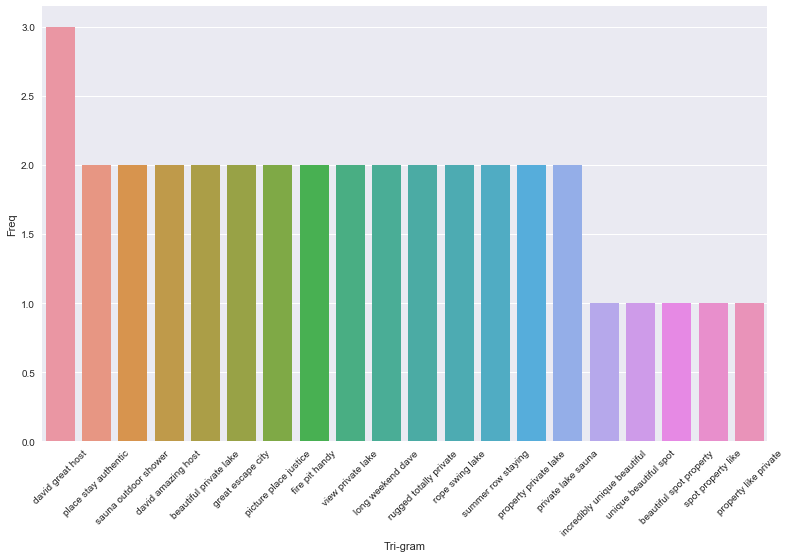

In [518]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [559]:
final = []

for item in top3_words: 
    tri_grams = {}
    found = False
    chunk = item[0]
    #print(chunk)
    processed = data['Processed'].tolist()
    random.shuffle(processed)
    #print(processed)
    for sentence in processed: 
        if chunk in sentence: 
            tri_grams['question'] = chunk
            tri_grams['answer'] = sentence
            final.append(tri_grams)
            found = True
            break
    if (not found):
        word = chunk.split(" ")[0] #taking the first word
        #print(chunk)
        random.shuffle(processed)
        for sentence in processed: 
            if word in sentence: 
                tri_grams['question'] = chunk
                tri_grams['answer'] = sentence
                final.append(tri_grams)
                found = True
                break
        if (not found): 
            print('Nothing')
    print("_____________________________________________________________")

final

_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
_____________________________________________________________
________

[{'question': 'david great host',
  'answer': 'this is my nd tour david s property hours away from city very rugged and totally private we had an unforgetable days hunting fishing trip for group of six and we are planning come back at anytime next year'},
 {'question': 'place stay authentic',
  'answer': 'have rented this place twice now dave was an incredible host very accommodating and makes every effort to make sure everything is in order prior to arrival accommodations are exactly as displayed beautiful setting would strongly recommend it to anyone looking for an off grid getaway '},
 {'question': 'sauna outdoor shower',
  'answer': 'david s place is truly an amazing experience the notion of private lake is not an understatement i visited the cottage with other friends and it was beyond all of our expectations if you do not need a phone for a weekend this is truly the place to stay authentic cottage separate bunky cabin sauna outdoor shower stay would book again david is also an am

In [560]:
final_trigrams = []
for pair in final: 
    new_dict = {}
    new_dict['type'] = 'faq'
    new_dict['faq'] = pair
    new_dict['externalUrl'] = 'http://test.co/info/{{$guid}}'
    final_trigrams.append(new_dict)
final_trigrams

[{'type': 'faq',
  'faq': {'question': 'david great host',
   'answer': 'this is my nd tour david s property hours away from city very rugged and totally private we had an unforgetable days hunting fishing trip for group of six and we are planning come back at anytime next year'},
  'externalUrl': 'http://test.co/info/{{$guid}}'},
 {'type': 'faq',
  'faq': {'question': 'place stay authentic',
   'answer': 'have rented this place twice now dave was an incredible host very accommodating and makes every effort to make sure everything is in order prior to arrival accommodations are exactly as displayed beautiful setting would strongly recommend it to anyone looking for an off grid getaway '},
  'externalUrl': 'http://test.co/info/{{$guid}}'},
 {'type': 'faq',
  'faq': {'question': 'sauna outdoor shower',
   'answer': 'david s place is truly an amazing experience the notion of private lake is not an understatement i visited the cottage with other friends and it was beyond all of our expecta

In [562]:
def creating_entry(question, answer): 
    
    #creating pair
    pair = {}
    pair['question'] = question
    pair['answer'] = answer
    
    over_arching = {}
    over_arching['type'] = 'faq'
    over_arching['faq'] = pair
    over_arching['externalUrl'] = 'http://test.co/info/{{$guid}}'
    
    final_trigrams.append(over_arching)
    
    return over_arching

In [563]:
creating_entry('What consumables do we have to bring?', 'We had to bring all consumables including but not limited to: blankets, sheets, pillows, pillow cases, towels, soaps, toilet paper, drinking water, garbage bags, etc... However, it was not too much of hassle since we there are multiple supermarkets within a 15 minutes drive. The location is really private, but not to far from the town of Haliburton. ')
creating_entry('Is there electricity?', 'There is no electricity. However, there are propane lights and fridge. Would highly suggest that you bring individual lights and lanters since candles are also not supplied. It really feels like going back to nature!!')
creating_entry("Is there heating, because I'm afraid it might be cold", 'It was an interesting experience having to rely solely on the firewood provided for indoor heating and also to get warm water for showering. It was daunting at first but the host was really nice and promptly responded when we were in doubt. Would highly recommend that you experience this!' )

{'type': 'faq',
 'faq': {'question': "Is there heating, because I'm afraid it might be cold",
  'answer': 'It was an interesting experience having to rely solely on the firewood provided for indoor heating and also to get warm water for showering. It was daunting at first but the host was really nice and promptly responded when we were in doubt. Would highly recommend that you experience this!'},
 'externalUrl': 'http://test.co/info/{{$guid}}'}

In [564]:
import json
with open('callMeMaybe_trigram.json', 'w') as json_file:
    json.dump(final_trigrams, json_file)